In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.measure import compare_psnr
from skimage.util import random_noise
import scipy.ndimage
from google.colab import drive

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
drive.mount('/content/gdrive')
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving proba_original.jpeg to proba_original (2).jpeg
Saving proba_noisy.jpeg to proba_noisy (2).jpeg
Saving cameraman_original.jpeg to cameraman_original (2).jpeg
Saving cameraman_noisy.jpeg to cameraman_noisy (2).jpeg
Saving balloons_original.png to balloons_original (2).png
Saving balloons_noisy.jpeg to balloons_noisy (2).jpeg


In [0]:
data = scipy.ndimage.imread("cameraman_noisy.jpeg", mode='L')
golden_data = scipy.ndimage.imread("cameraman_original.jpeg", mode='L')

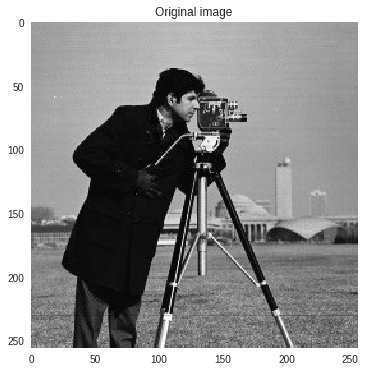

In [13]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots()
ax.grid(False)
plt.title("Original image")
plt.imshow(golden_data, cmap=plt.cm.gray, interpolation='nearest')

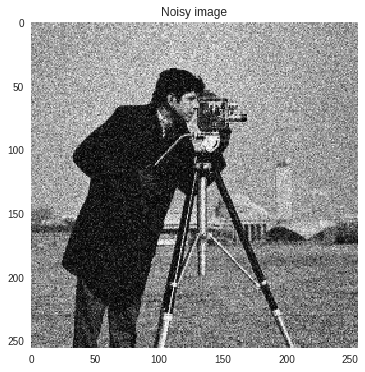

In [14]:
fig, ax = plt.subplots()
ax.grid(False)
plt.title("Noisy image")
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')


In [0]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))


In [0]:
sigma = 0.08
patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                multichannel=True)

start = time.time()

sigma_est = np.mean(estimate_sigma(data, multichannel=True))

denoise = denoise_nl_means(data, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)   # fast mode off

denoise_fast = denoise_nl_means(data, h=0.8 * sigma_est, fast_mode=True,
                                **patch_kw)  # fast mode on

end = time.time()

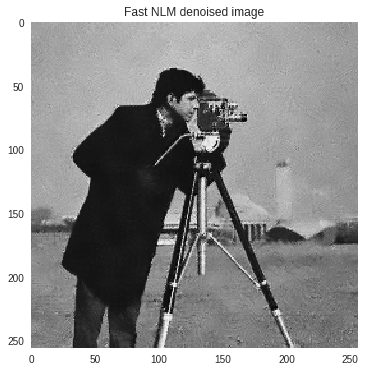

In [17]:
fig, ax = plt.subplots()
ax.grid(False)
plt.title("Fast NLM denoised image")
plt.imshow(denoise_fast, cmap=plt.cm.gray, interpolation='nearest')

In [18]:
fast_difference = denoise_fast - golden_data
print("Frobenius distance FAST    ", np.linalg.norm(fast_difference))
print("Time for calculation       ", end-start)
print("PSNR FAST                  ", psnr(golden_data, denoise_fast))

Frobenius distance FAST     3175.0564
Time for calculation        1.7192506790161133
PSNR FAST                   26.260573371228794


Text(0.5, 1.0, 'Residuals FAST')

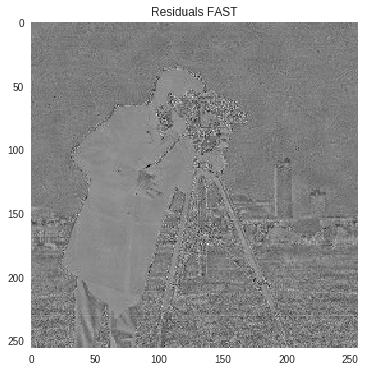

In [19]:
fig, ax = plt.subplots()
ax.grid(False)
ax.imshow(fast_difference, cmap=plt.cm.gray, interpolation='nearest')
plt.title("Residuals FAST")

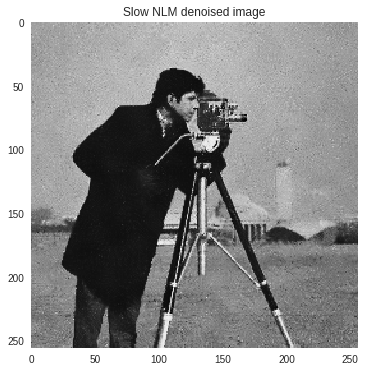

In [20]:
fig, ax = plt.subplots()
ax.grid(False)
plt.title("Slow NLM denoised image")
plt.imshow(denoise, cmap=plt.cm.gray, interpolation='nearest')

In [21]:
difference = denoise - golden_data
print("Frobenius distance    ", np.linalg.norm(difference))
print("Time for calculation  ", end-start)
print("PSNR                  ", psnr(golden_data, denoise))

Frobenius distance     3299.7153
Time for calculation   1.7192506790161133
PSNR                   25.9260734207562


Text(0.5, 1.0, 'Residuals FAST')

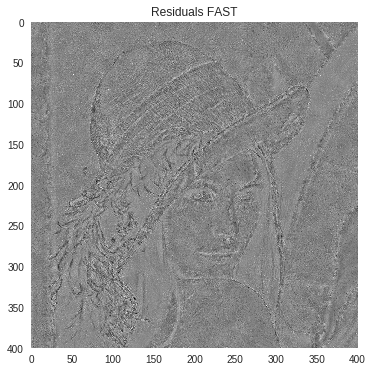

In [13]:
fig, ax = plt.subplots()
ax.grid(False)
ax.imshow(difference, cmap=plt.cm.gray, interpolation='nearest')
plt.title("Residuals FAST")